# Image Classification using Convolutional Neural Networks (CNNs)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1376s 8us/step


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.3333 - loss: 1.7829 - val_accuracy: 0.5461 - val_loss: 1.2395
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5662 - loss: 1.2055 - val_accuracy: 0.5993 - val_loss: 1.1246
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6344 - loss: 1.0295 - val_accuracy: 0.6620 - val_loss: 0.9580
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6822 - loss: 0.8994 - val_accuracy: 0.6818 - val_loss: 0.9098
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7170 - loss: 0.8099 - val_accuracy: 0.6970 - val_loss: 0.8727
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7370 - loss: 0.7473 - val_accuracy: 0.6959 - val_loss: 0.8822
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7574 - loss: 0.6950 - val_accuracy: 0.7020 - val_loss: 0.8791
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7733 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7174 - loss: 0.8471
Test Accuracy: 0.7160000205039978


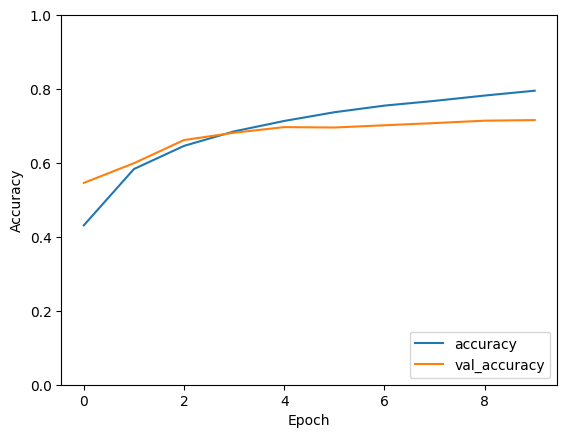

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
